# Homework 2: Problem 2

1. (5 points) Develop pseudocode/code to generating additional observations from the provided Iris data set. The number of additional observations will be 100 per class.
2. (5 points) Calculate the running time of your pseudocode/code. Do not just show your tighter bound with Θ, show the calculations from your code or pseudocode.
3. (5 points) Generate 100 additional observations for each flower class. This will result in an additional 300 total observations.
4. (5 points) Plot your data by class (flower type) in a figure as shown in Figure 1. You can choose any two features to show your data, e.g., sepal length vs. petal width.

In [92]:
import numpy as np
import pandas as pd
from sklearn import datasets
from typing import Dict, Tuple, Callable
from collections import namedtuple

iris_in: np.array = datasets.load_iris()
data = dict(
    setosa = iris["data"][:50],
    versicolor = iris["data"][50:100],
    virginica = iris["data"][100:]
)
data

{'setosa': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],


In [66]:
Stats = namedtuple("Stats", ["cov", "mean", "min", "max"])

def describe(data: np.array) -> Stats:
    return Stats(
        cov = np.cov(data.T),
        mean = np.mean(data, axis=0),
        min = np.min(data, axis=0),
        max = np.max(data, axis=0)
    )

describe(data["setosa"])

Stats(cov=array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]]), mean=array([5.006, 3.428, 1.462, 0.246]), min=array([4.3, 2.3, 1. , 0.1]), max=array([5.8, 4.4, 1.9, 0.6]))

In [67]:
x = np.array([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
])
y = np.array([
    [10,10,10,10],
    [20,20,20,20],
    [30,30,30,30]
])

x.dot(y.T)

array([[ 40,  80, 120],
       [ 80, 160, 240],
       [120, 240, 360]])

In [122]:
%%timeit
def align_mean(data: np.array, target_mean: np.array) -> np.array:
    input_mean: np.array = np.mean(data, axis=0)
    mean_diff: np.array = input_mean - target_mean
    return data - mean_diff

def min_max_norm(data: np.array, min_vals: np.array, max_vals: np.array) -> np.array:
    input_min: np.array = np.min(data, axis=0)
    input_max: np.array = np.max(data, axis=0)
    data_in_unit_itvl: np.array = (data - input_min) / (input_max - input_min)
    target_range: np.array = max_vals - min_vals
    return (data_in_unit_itvl * target_range) + input_min
    
def normalize(data: np.array, stats: Stats) -> np.array:
    with_target_mean: np.array = align_mean(data, stats.mean)
    with_target_range: np.array = min_max_norm(with_target_mean, stats.min, stats.max)
    return with_target_range

def gen_norm_data(stats: Stats, n: int = 100) -> np.array:
    ncol: int = stats.mean.size
    rand_data: np.array = np.random.uniform(size = ncol*n).reshape(n, ncol)
    norm_data: np.array = normalize(rand_data, stats)
    return norm_data

def align_covariance(data: np.array, stats: Stats) -> np.array:
    return data.dot(stats.cov)

def gen_synthetic_data(input_data: np.array, n: int = 100) -> np.array:
    input_stats: Stats = describe(input_data)
    init_synthetic: np.array = gen_norm_data(input_stats, n)
    cov_adjusted: np.array = align_covariance(init_synthetic, input_stats)
    second_norm: np.array = normalize(cov_adjusted, input_stats)
    return second_norm

gen_synthetic_data(data["setosa"])

200 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [116]:
def getCol(data: np.array, feature: str) -> np.array:
    label_map: Dict[str, int] = dict(sepal_length=0, sepal_width=1, petal_length=2, petal_width=3)
    return data[:, label_map[feature]]

synthetic: Dict[str, np.array] = {species: gen_synthetic_data(d) for (species, d) in data.items()}
getCol(synthetic["setosa"], "sepal_length")

array([5.45202134, 5.65695809, 6.0029    , 5.52672415, 5.62766447,
       6.0272124 , 6.05092687, 5.04946363, 5.71271026, 4.85472734,
       5.78412637, 5.88580734, 5.75001935, 5.5963775 , 6.14192254,
       5.6865323 , 5.74747557, 5.4188362 , 5.51016131, 5.65054569,
       5.43336756, 4.86696769, 5.41412938, 5.67583234, 5.28750853,
       5.48642308, 6.12317334, 6.02997907, 5.59226736, 6.29454546,
       5.83308637, 5.70195731, 5.42643858, 5.07791549, 5.12098568,
       6.17186868, 5.82773606, 5.86190994, 5.19689655, 5.16168294,
       5.32623633, 5.48400674, 5.41425135, 5.74465018, 5.45541382,
       5.13769799, 5.94552802, 5.17723233, 5.06650669, 5.41766443,
       5.32560925, 6.15483488, 4.83906371, 5.74442242, 5.52452106,
       5.61059278, 5.60544552, 5.37612709, 5.21768944, 5.08901683,
       6.14432129, 6.09345878, 5.14347751, 5.8440608 , 4.97671323,
       5.21034031, 5.62397605, 5.94405191, 5.71120679, 5.40868448,
       5.65324658, 6.01656851, 5.24355461, 4.90727673, 5.03200

In [117]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


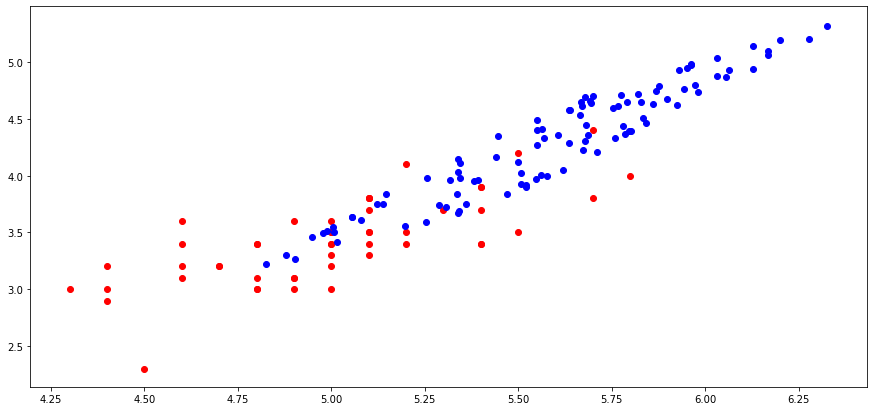

In [120]:
def compare_synth_data(data: Dict[str, np.array], species: str, features: Tuple[str, str]) -> None:
    input_data: np.array = data[species]
    synth_data: np.array = gen_synthetic_data(input_data)
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(getCol(input_data, features[0]), getCol(input_data, features[1]), c='r')
    ax.scatter(getCol(synth_data, features[0]), getCol(synth_data, features[1]), c='b')
                                                                          
compare_synth_data(data, "setosa", ("sepal_length", "sepal_width"))

In [8]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [55]:
??np.lina